# <font color='#708090'>**Limpeza dos dados**</font>

# **1.0 Import**

In [ ]:
import pandas   as pd
import numpy    as np
import seaborn             as sns
import matplotlib.gridspec as gridspec
import plotly.express      as px
import matplotlib.pyplot as plt


## 1.1 Helper Functions

In [ ]:
#Estatística descritiva - medidas central.
def descriptive_statistics(df1_num):

    # Central Tendency - mean, meadina
    ct1= pd.DataFrame(df1_num.apply(np.mean)).T
    ct2= pd.DataFrame(df1_num.apply(np.median)).T

    # dispersion - std, min, max, range, skew, kurtosis
    ct3= pd.DataFrame(df1_num.apply(np.std)).T
    ct4= pd.DataFrame(df1_num.apply(min)).T
    ct5= pd.DataFrame(df1_num.apply(max)).T
    ct6= pd.DataFrame(df1_num.apply(lambda x: x.max() - x.min())).T
    ct7= pd.DataFrame(df1_num.apply(lambda x: x.skew())).T
    ct8= pd.DataFrame(df1_num.apply(lambda x: x.kurtosis())).T
    #ct9 = pd.DataFrame(df1_num.apply(lambda x: 'not normal' if shapiro(x.sample(5000))[1] < 0.05 else 'normal')).T

    # concatenar
    df_statistics= pd.concat([ct4, ct5, ct6, ct1, ct2,ct3, ct7, ct8]).T #ct9
    df_statistics.columns=['min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']#shapiro
    df_statistics.round(2)

    return df_statistics


## 1.2 Load data

#### qualidade aprovada

In [ ]:
df_raw_qa = pd.read_csv("df_quantidade_aprovada.csv",low_memory = False)

#### valor aprovado

In [ ]:
df_raw_va = pd.read_csv("df_valor_aprovado.csv",low_memory = False)

# **2.0 Descrição dos Dados**

#### qualidade aprovada

In [ ]:
df1_qa = df_raw_qa.copy()

In [ ]:
df1_qa.head()

,0,1,2,3,4,5,6,7,8,9,Período
0,TOTAL,211,13.531.483,10.103.301,962.775,41.317,250.768,220.658,3.516.251,28.626.764,Jan/2019
1,110001 ALTA FLORESTA D'OESTE,-,-,125,7,-,-,-,51,183,Jan/2019
2,110002 ARIQUEMES,-,136,2.888,859,-,14,4,1.147,5.048,Jan/2019
3,110003 CABIXI,-,20,20,-,-,-,-,12,52,Jan/2019
4,110004 CACOAL,-,8.870,15.976,924,2,5,95,2.556,28.428,Jan/2019


#### valor aprovado

In [ ]:
df1_va = df_raw_va.copy()

In [ ]:
df1_va.head()

,0,1,2,3,4,5,6,7,8,Período
0,TOTAL,"55.246.070,34","340.159.908,29","395.912.811,40","54.748.172,55","7.724.936,34","120.504.442,87","313.977.961,67","1.288.274.303,46",Jan/2019
1,110001 ALTA FLORESTA D'OESTE,-,"37.897,63","3.087,89",-,-,-,"408,00","41.393,52",Jan/2019
2,110002 ARIQUEMES,"1.056,29","128.329,40","99.413,85",-,"1.037,96",-,"118.467,79","348.305,29",Jan/2019
3,110003 CABIXI,-,"5.981,97",-,-,-,-,"96,00","6.077,97",Jan/2019
4,110004 CACOAL,"69.881,30","267.911,33","312.777,55","1.914,76","466,40","31.446,75","363.285,36","1.047.683,45",Jan/2019


## 2.1 Rename Columns

#### qualidade aprovada

In [ ]:
df1_qa.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'Período'], dtype='object')

In [ ]:
df1_qa = df1_qa.rename(columns={'0': 'qa_município',
                                '1': 'qa_ações_de_promoção_e_prevenção_em_saúde',
                                '2': 'qa_procedimentos_com_finalidade_diagnóstica',
                                '3': 'qa_procedimentos_clínicos',
                                '4': 'qa_procedimentos_cirúrgicos',
                                '5': 'qa_transplantes_de_orgãos_tecidos_e_células',
                                '6': 'qa_medicamentos',
                                '7': 'qa_órteses_próteses_e_materiais_especiais',
                                '8': 'qa_ações_complementares_da_atenção_à_saúde',
                                '9':'qa_total',
                                'Período': 'qa_período'})

In [ ]:
df1_qa.head()

,qa_município,qa_ações_de_promoção_e_prevenção_em_saúde,qa_procedimentos_com_finalidade_diagnóstica,qa_procedimentos_clínicos,qa_procedimentos_cirúrgicos,qa_transplantes_de_orgãos_tecidos_e_células,qa_medicamentos,qa_órteses_próteses_e_materiais_especiais,qa_ações_complementares_da_atenção_à_saúde,qa_total,qa_período
0,TOTAL,211,13.531.483,10.103.301,962.775,41.317,250.768,220.658,3.516.251,28.626.764,Jan/2019
1,110001 ALTA FLORESTA D'OESTE,-,-,125,7,-,-,-,51,183,Jan/2019
2,110002 ARIQUEMES,-,136,2.888,859,-,14,4,1.147,5.048,Jan/2019
3,110003 CABIXI,-,20,20,-,-,-,-,12,52,Jan/2019
4,110004 CACOAL,-,8.870,15.976,924,2,5,95,2.556,28.428,Jan/2019


#### valor aprovado

In [ ]:
df1_va.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', 'Período'], dtype='object')

In [ ]:
df1_va = df1_va.rename(columns={'0': 'va_município',
                                '1': 'va_procedimentos_com_finalidade_diagnóstica',
                                '2': 'va_procedimentos_clínicos',
                                '3': 'va_procedimentos_cirúrgicos',
                                '4': 'va_transplantes_de_orgãos_tecidos_e_células',
                                '5': 'va_medicamentos',
                                '6': 'va_órteses_próteses_e_materiais_especiais',
                                '7': 'va_ações_complementares_da_atenção_à_saúde',
                                '8':'va_total',
                                'Período': 'va_período'})

In [ ]:
df1_va.head()

,va_município,va_procedimentos_com_finalidade_diagnóstica,va_procedimentos_clínicos,va_procedimentos_cirúrgicos,va_transplantes_de_orgãos_tecidos_e_células,va_medicamentos,va_órteses_próteses_e_materiais_especiais,va_ações_complementares_da_atenção_à_saúde,va_total,va_período
0,TOTAL,"55.246.070,34","340.159.908,29","395.912.811,40","54.748.172,55","7.724.936,34","120.504.442,87","313.977.961,67","1.288.274.303,46",Jan/2019
1,110001 ALTA FLORESTA D'OESTE,-,"37.897,63","3.087,89",-,-,-,"408,00","41.393,52",Jan/2019
2,110002 ARIQUEMES,"1.056,29","128.329,40","99.413,85",-,"1.037,96",-,"118.467,79","348.305,29",Jan/2019
3,110003 CABIXI,-,"5.981,97",-,-,-,-,"96,00","6.077,97",Jan/2019
4,110004 CACOAL,"69.881,30","267.911,33","312.777,55","1.914,76","466,40","31.446,75","363.285,36","1.047.683,45",Jan/2019


## 2.2 Data Dimensions

#### qualidade aprovada

In [ ]:
print ("Number of Rows:{}".format(df1_qa.shape[0]))
print ("Number of Cols:{}".format(df1_qa.shape[1]))

Number of Rows:180355
Number of Cols:11


#### valor aprovada

In [ ]:
print ("Number of Rows:{}".format(df1_va.shape[0]))
print ("Number of Cols:{}".format(df1_va.shape[1]))

Number of Rows:180354
Number of Cols:10


## 2.3 Data Types

#### qualidade aprovada

In [ ]:
df1_qa.dtypes

qa_município                                   object
qa_ações_de_promoção_e_prevenção_em_saúde      object
qa_procedimentos_com_finalidade_diagnóstica    object
qa_procedimentos_clínicos                      object
qa_procedimentos_cirúrgicos                    object
qa_transplantes_de_orgãos_tecidos_e_células    object
qa_medicamentos                                object
qa_órteses_próteses_e_materiais_especiais      object
qa_ações_complementares_da_atenção_à_saúde     object
qa_total                                       object
qa_período                                     object
dtype: object

#### valor aprovado

In [ ]:
df1_va.dtypes

va_município                                   object
va_procedimentos_com_finalidade_diagnóstica    object
va_procedimentos_clínicos                      object
va_procedimentos_cirúrgicos                    object
va_transplantes_de_orgãos_tecidos_e_células    object
va_medicamentos                                object
va_órteses_próteses_e_materiais_especiais      object
va_ações_complementares_da_atenção_à_saúde     object
va_total                                       object
va_período                                     object
dtype: object

## 2.4 Check NA

#### qualidade aprovada

In [ ]:
df1_qa.isna().sum()

qa_município                                   0
qa_ações_de_promoção_e_prevenção_em_saúde      0
qa_procedimentos_com_finalidade_diagnóstica    0
qa_procedimentos_clínicos                      0
qa_procedimentos_cirúrgicos                    0
qa_transplantes_de_orgãos_tecidos_e_células    0
qa_medicamentos                                0
qa_órteses_próteses_e_materiais_especiais      0
qa_ações_complementares_da_atenção_à_saúde     0
qa_total                                       0
qa_período                                     0
dtype: int64

#### valor aprovado

In [ ]:
df1_va.isna().sum()

va_município                                   0
va_procedimentos_com_finalidade_diagnóstica    0
va_procedimentos_clínicos                      0
va_procedimentos_cirúrgicos                    0
va_transplantes_de_orgãos_tecidos_e_células    0
va_medicamentos                                0
va_órteses_próteses_e_materiais_especiais      0
va_ações_complementares_da_atenção_à_saúde     0
va_total                                       0
va_período                                     0
dtype: int64

## 2.5 Fillout NA

#### qualidade aprovada

In [ ]:
df1_qa.replace('-', 0, inplace=True)

In [ ]:
df1_qa.head()

,qa_município,qa_ações_de_promoção_e_prevenção_em_saúde,qa_procedimentos_com_finalidade_diagnóstica,qa_procedimentos_clínicos,qa_procedimentos_cirúrgicos,qa_transplantes_de_orgãos_tecidos_e_células,qa_medicamentos,qa_órteses_próteses_e_materiais_especiais,qa_ações_complementares_da_atenção_à_saúde,qa_total,qa_período
0,TOTAL,211,13.531.483,10.103.301,962.775,41.317,250.768,220.658,3.516.251,28.626.764,Jan/2019
1,110001 ALTA FLORESTA D'OESTE,0,0,125,7,0,0,0,51,183,Jan/2019
2,110002 ARIQUEMES,0,136,2.888,859,0,14,4,1.147,5.048,Jan/2019
3,110003 CABIXI,0,20,20,0,0,0,0,12,52,Jan/2019
4,110004 CACOAL,0,8.870,15.976,924,2,5,95,2.556,28.428,Jan/2019


#### valor aprovado

In [ ]:
df1_va.replace('-', 0, inplace=True)


In [ ]:
df1_va.head()

,va_município,va_procedimentos_com_finalidade_diagnóstica,va_procedimentos_clínicos,va_procedimentos_cirúrgicos,va_transplantes_de_orgãos_tecidos_e_células,va_medicamentos,va_órteses_próteses_e_materiais_especiais,va_ações_complementares_da_atenção_à_saúde,va_total,va_período
0,TOTAL,"55.246.070,34","340.159.908,29","395.912.811,40","54.748.172,55","7.724.936,34","120.504.442,87","313.977.961,67","1.288.274.303,46",Jan/2019
1,110001 ALTA FLORESTA D'OESTE,0,"37.897,63","3.087,89",0,0,0,"408,00","41.393,52",Jan/2019
2,110002 ARIQUEMES,"1.056,29","128.329,40","99.413,85",0,"1.037,96",0,"118.467,79","348.305,29",Jan/2019
3,110003 CABIXI,0,"5.981,97",0,0,0,0,"96,00","6.077,97",Jan/2019
4,110004 CACOAL,"69.881,30","267.911,33","312.777,55","1.914,76","466,40","31.446,75","363.285,36","1.047.683,45",Jan/2019


## 2.6 Change Types

### Qualidade Aprovada

In [ ]:
df1_qa.columns

Index(['qa_município', 'qa_ações_de_promoção_e_prevenção_em_saúde',
       'qa_procedimentos_com_finalidade_diagnóstica',
       'qa_procedimentos_clínicos', 'qa_procedimentos_cirúrgicos',
       'qa_transplantes_de_orgãos_tecidos_e_células', 'qa_medicamentos',
       'qa_órteses_próteses_e_materiais_especiais',
       'qa_ações_complementares_da_atenção_à_saúde', 'qa_total', 'qa_período'],
      dtype='object')

In [ ]:
# Remover pontos das strings e converter para números inteiros nas colunas de 2 a 10
df1_qa.iloc[:, 1:10] = df1_qa.iloc[:, 1:10].replace('\.', '', regex=True).astype(int)


In [ ]:
df1_qa.head()

,qa_município,qa_ações_de_promoção_e_prevenção_em_saúde,qa_procedimentos_com_finalidade_diagnóstica,qa_procedimentos_clínicos,qa_procedimentos_cirúrgicos,qa_transplantes_de_orgãos_tecidos_e_células,qa_medicamentos,qa_órteses_próteses_e_materiais_especiais,qa_ações_complementares_da_atenção_à_saúde,qa_total,qa_período
0,TOTAL,211,13531483,10103301,962775,41317,250768,220658,3516251,28626764,Jan/2019
1,110001 ALTA FLORESTA D'OESTE,0,0,125,7,0,0,0,51,183,Jan/2019
2,110002 ARIQUEMES,0,136,2888,859,0,14,4,1147,5048,Jan/2019
3,110003 CABIXI,0,20,20,0,0,0,0,12,52,Jan/2019
4,110004 CACOAL,0,8870,15976,924,2,5,95,2556,28428,Jan/2019


In [ ]:
# Converter para int
df1_qa['qa_ações_de_promoção_e_prevenção_em_saúde'] = df1_qa['qa_ações_de_promoção_e_prevenção_em_saúde'].astype(int)
df1_qa['qa_procedimentos_com_finalidade_diagnóstica'] = df1_qa['qa_procedimentos_com_finalidade_diagnóstica'].astype(int)
df1_qa['qa_procedimentos_clínicos'] = df1_qa['qa_procedimentos_clínicos'].astype(int)
df1_qa['qa_procedimentos_cirúrgicos'] = df1_qa['qa_procedimentos_cirúrgicos'].astype(int)
df1_qa['qa_transplantes_de_orgãos_tecidos_e_células'] = df1_qa['qa_transplantes_de_orgãos_tecidos_e_células'].astype(int)
df1_qa['qa_medicamentos'] = df1_qa['qa_medicamentos'].astype(int)
df1_qa['qa_órteses_próteses_e_materiais_especiais'] = df1_qa['qa_órteses_próteses_e_materiais_especiais'].astype(int)
df1_qa['qa_ações_complementares_da_atenção_à_saúde'] = df1_qa['qa_ações_complementares_da_atenção_à_saúde'].astype(int)
df1_qa['qa_total'] = df1_qa['qa_total'].astype(int)


In [ ]:
# Separar em mês e ano
df1_qa[['qa_mês', 'qa_ano']] = df1_qa['qa_período'].str.split('/', expand=True)

In [ ]:
df1_qa['qa_ano'] = df1_qa['qa_ano'].astype(int)

In [ ]:
# Converte o mês de texto para o número do mês
meses_dict = {'Jan': 1, 'Fev': 2, 'Mar': 3, 'Abr': 4, 'Mai': 5, 'Jun': 6, 'Jul': 7, 'Ago': 8, 'Set': 9, 'Out': 10, 'Nov': 11, 'Dez': 12}
df1_qa['qa_dia_mês'] = df1_qa['qa_mês'].map(meses_dict)


In [ ]:
df1_qa.dtypes

qa_município                                   object
qa_ações_de_promoção_e_prevenção_em_saúde       int64
qa_procedimentos_com_finalidade_diagnóstica     int64
qa_procedimentos_clínicos                       int64
qa_procedimentos_cirúrgicos                     int64
qa_transplantes_de_orgãos_tecidos_e_células     int64
qa_medicamentos                                 int64
qa_órteses_próteses_e_materiais_especiais       int64
qa_ações_complementares_da_atenção_à_saúde      int64
qa_total                                        int64
qa_período                                     object
qa_mês                                         object
qa_ano                                          int64
qa_dia_mês                                      int64
dtype: object

In [ ]:
df1_qa.head()

,qa_município,qa_ações_de_promoção_e_prevenção_em_saúde,qa_procedimentos_com_finalidade_diagnóstica,qa_procedimentos_clínicos,qa_procedimentos_cirúrgicos,qa_transplantes_de_orgãos_tecidos_e_células,qa_medicamentos,qa_órteses_próteses_e_materiais_especiais,qa_ações_complementares_da_atenção_à_saúde,qa_total,qa_período,qa_mês,qa_ano,qa_dia_mês
0,TOTAL,211,13531483,10103301,962775,41317,250768,220658,3516251,28626764,Jan/2019,Jan,2019,1
1,110001 ALTA FLORESTA D'OESTE,0,0,125,7,0,0,0,51,183,Jan/2019,Jan,2019,1
2,110002 ARIQUEMES,0,136,2888,859,0,14,4,1147,5048,Jan/2019,Jan,2019,1
3,110003 CABIXI,0,20,20,0,0,0,0,12,52,Jan/2019,Jan,2019,1
4,110004 CACOAL,0,8870,15976,924,2,5,95,2556,28428,Jan/2019,Jan,2019,1


### Valor aprovado

In [ ]:
df1_va.columns

Index(['va_município', 'va_procedimentos_com_finalidade_diagnóstica',
       'va_procedimentos_clínicos', 'va_procedimentos_cirúrgicos',
       'va_transplantes_de_orgãos_tecidos_e_células', 'va_medicamentos',
       'va_órteses_próteses_e_materiais_especiais',
       'va_ações_complementares_da_atenção_à_saúde', 'va_total', 'va_período'],
      dtype='object')

In [ ]:
# Substituir os pontos de milhar por uma string vazia e trocar a vírgula por ponto
df1_va.iloc[:, 1:9] = df1_va.iloc[:, 1:9].replace('\.', '', regex=True).replace(',', '.', regex=True).astype(float)


In [ ]:
# Converter para int
df1_va['va_procedimentos_com_finalidade_diagnóstica'] = df1_va['va_procedimentos_com_finalidade_diagnóstica'].astype(float)
df1_va['va_procedimentos_clínicos'] = df1_va['va_procedimentos_clínicos'].astype(float)
df1_va['va_procedimentos_cirúrgicos'] = df1_va['va_procedimentos_cirúrgicos'].astype(float)
df1_va['va_transplantes_de_orgãos_tecidos_e_células'] = df1_va['va_transplantes_de_orgãos_tecidos_e_células'].astype(float)
df1_va['va_medicamentos'] = df1_va['va_medicamentos'].astype(float)
df1_va['va_órteses_próteses_e_materiais_especiais'] = df1_va['va_órteses_próteses_e_materiais_especiais'].astype(float)
df1_va['va_ações_complementares_da_atenção_à_saúde'] = df1_va['va_ações_complementares_da_atenção_à_saúde'].astype(float)
df1_va['va_total'] = df1_va['va_total'].astype(float)


In [ ]:
# Separar em mês e ano
df1_va[['va_mês', 'va_ano']] = df1_va['va_período'].str.split('/', expand=True)


In [ ]:
#df1_va['ano'] = df1_va['ano'].astype(int)

In [ ]:
# Converte o mês de texto para o número do mês
meses_dict = {'Jan': 1, 'Fev': 2, 'Mar': 3, 'Abr': 4, 'Mai': 5, 'Jun': 6, 'Jul': 7, 'Ago': 8, 'Set': 9, 'Out': 10, 'Nov': 11, 'Dez': 12}
df1_va['va_dia_mês'] = df1_va['va_mês'].map(meses_dict)


In [ ]:
df1_va.dtypes

va_município                                    object
va_procedimentos_com_finalidade_diagnóstica    float64
va_procedimentos_clínicos                      float64
va_procedimentos_cirúrgicos                    float64
va_transplantes_de_orgãos_tecidos_e_células    float64
va_medicamentos                                float64
va_órteses_próteses_e_materiais_especiais      float64
va_ações_complementares_da_atenção_à_saúde     float64
va_total                                       float64
va_período                                      object
va_mês                                          object
va_ano                                          object
va_dia_mês                                       int64
dtype: object

In [ ]:
pd.set_option('display.float_format', '{:.2f}'.format)


In [ ]:
df1_va.head()

,va_município,va_procedimentos_com_finalidade_diagnóstica,va_procedimentos_clínicos,va_procedimentos_cirúrgicos,va_transplantes_de_orgãos_tecidos_e_células,va_medicamentos,va_órteses_próteses_e_materiais_especiais,va_ações_complementares_da_atenção_à_saúde,va_total,va_período,va_mês,va_ano,va_dia_mês
0,TOTAL,55246070.34,340159908.29,395912811.40,54748172.55,7724936.34,120504442.87,313977961.67,1288274303.46,Jan/2019,Jan,2019,1
1,110001 ALTA FLORESTA D'OESTE,0.00,37897.63,3087.89,0.00,0.00,0.00,408.00,41393.52,Jan/2019,Jan,2019,1
2,110002 ARIQUEMES,1056.29,128329.40,99413.85,0.00,1037.96,0.00,118467.79,348305.29,Jan/2019,Jan,2019,1
3,110003 CABIXI,0.00,5981.97,0.00,0.00,0.00,0.00,96.00,6077.97,Jan/2019,Jan,2019,1
4,110004 CACOAL,69881.30,267911.33,312777.55,1914.76,466.40,31446.75,363285.36,1047683.45,Jan/2019,Jan,2019,1


### - Merge datasets -

In [ ]:
df_agrupado = pd.concat([df1_qa, df1_va], axis=1)


In [ ]:
df_agrupado.columns

Index(['qa_município', 'qa_ações_de_promoção_e_prevenção_em_saúde',
       'qa_procedimentos_com_finalidade_diagnóstica',
       'qa_procedimentos_clínicos', 'qa_procedimentos_cirúrgicos',
       'qa_transplantes_de_orgãos_tecidos_e_células', 'qa_medicamentos',
       'qa_órteses_próteses_e_materiais_especiais',
       'qa_ações_complementares_da_atenção_à_saúde', 'qa_total', 'qa_período',
       'qa_mês', 'qa_ano', 'qa_dia_mês', 'va_município',
       'va_procedimentos_com_finalidade_diagnóstica',
       'va_procedimentos_clínicos', 'va_procedimentos_cirúrgicos',
       'va_transplantes_de_orgãos_tecidos_e_células', 'va_medicamentos',
       'va_órteses_próteses_e_materiais_especiais',
       'va_ações_complementares_da_atenção_à_saúde', 'va_total', 'va_período',
       'va_mês', 'va_ano', 'va_dia_mês'],
      dtype='object')

In [ ]:
df_agrupado.head()

,qa_município,qa_ações_de_promoção_e_prevenção_em_saúde,qa_procedimentos_com_finalidade_diagnóstica,qa_procedimentos_clínicos,qa_procedimentos_cirúrgicos,qa_transplantes_de_orgãos_tecidos_e_células,qa_medicamentos,qa_órteses_próteses_e_materiais_especiais,qa_ações_complementares_da_atenção_à_saúde,qa_total,...,va_procedimentos_cirúrgicos,va_transplantes_de_orgãos_tecidos_e_células,va_medicamentos,va_órteses_próteses_e_materiais_especiais,va_ações_complementares_da_atenção_à_saúde,va_total,va_período,va_mês,va_ano,va_dia_mês
0,TOTAL,211,13531483,10103301,962775,41317,250768,220658,3516251,28626764,...,395912811.40,54748172.55,7724936.34,120504442.87,313977961.67,1288274303.46,Jan/2019,Jan,2019,1.00
1,110001 ALTA FLORESTA D'OESTE,0,0,125,7,0,0,0,51,183,...,3087.89,0.00,0.00,0.00,408.00,41393.52,Jan/2019,Jan,2019,1.00
2,110002 ARIQUEMES,0,136,2888,859,0,14,4,1147,5048,...,99413.85,0.00,1037.96,0.00,118467.79,348305.29,Jan/2019,Jan,2019,1.00
3,110003 CABIXI,0,20,20,0,0,0,0,12,52,...,0.00,0.00,0.00,0.00,96.00,6077.97,Jan/2019,Jan,2019,1.00
4,110004 CACOAL,0,8870,15976,924,2,5,95,2556,28428,...,312777.55,1914.76,466.40,31446.75,363285.36,1047683.45,Jan/2019,Jan,2019,1.00


## 2.6 Descriptive Statistical

In [ ]:
df1_num=df_agrupado.select_dtypes(include=['int64', 'float64'])
df1_cat=df_agrupado.select_dtypes(exclude=['int64', 'float64', 'datetime'])

### 2.6.1 Numerical Attributes

In [ ]:
#descriptive_statistics(df1_num)


In [ ]:
df_filtered = df1_num[df1_num != 0]

In [ ]:
descriptive_statistics(df_filtered)

,min,max,range,mean,median,std,skew,kurtosis
qa_ações_de_promoção_e_prevenção_em_saúde,1.00,772.00,771.00,36.83,NaN,104.71,3.95,16.02
qa_procedimentos_com_finalidade_diagnóstica,1.00,22041351.00,22041350.00,13762.27,NaN,346803.56,49.75,2552.10
qa_procedimentos_clínicos,1.00,13734713.00,13734712.00,7672.79,NaN,212632.18,54.84,3075.83
qa_procedimentos_cirúrgicos,1.00,1160208.00,1160207.00,974.71,NaN,21758.09,44.31,1998.81
qa_transplantes_de_orgãos_tecidos_e_células,1.00,43331.00,43330.00,458.11,NaN,2993.88,11.60,141.94
qa_medicamentos,1.00,275271.00,275270.00,658.68,NaN,8888.01,24.89,652.16
qa_órteses_próteses_e_materiais_especiais,1.00,305423.00,305422.00,636.10,NaN,8815.67,27.32,761.94
qa_ações_complementares_da_atenção_à_saúde,1.00,4150572.00,4150571.00,2861.01,NaN,71258.38,49.29,2476.10
qa_total,1.00,40333989.00,40333988.00,22170.31,559.00,615454.31,54.77,3069.35
qa_ano,2019.00,2023.00,4.00,2021.00,2021.00,1.41,-0.01,-1.30


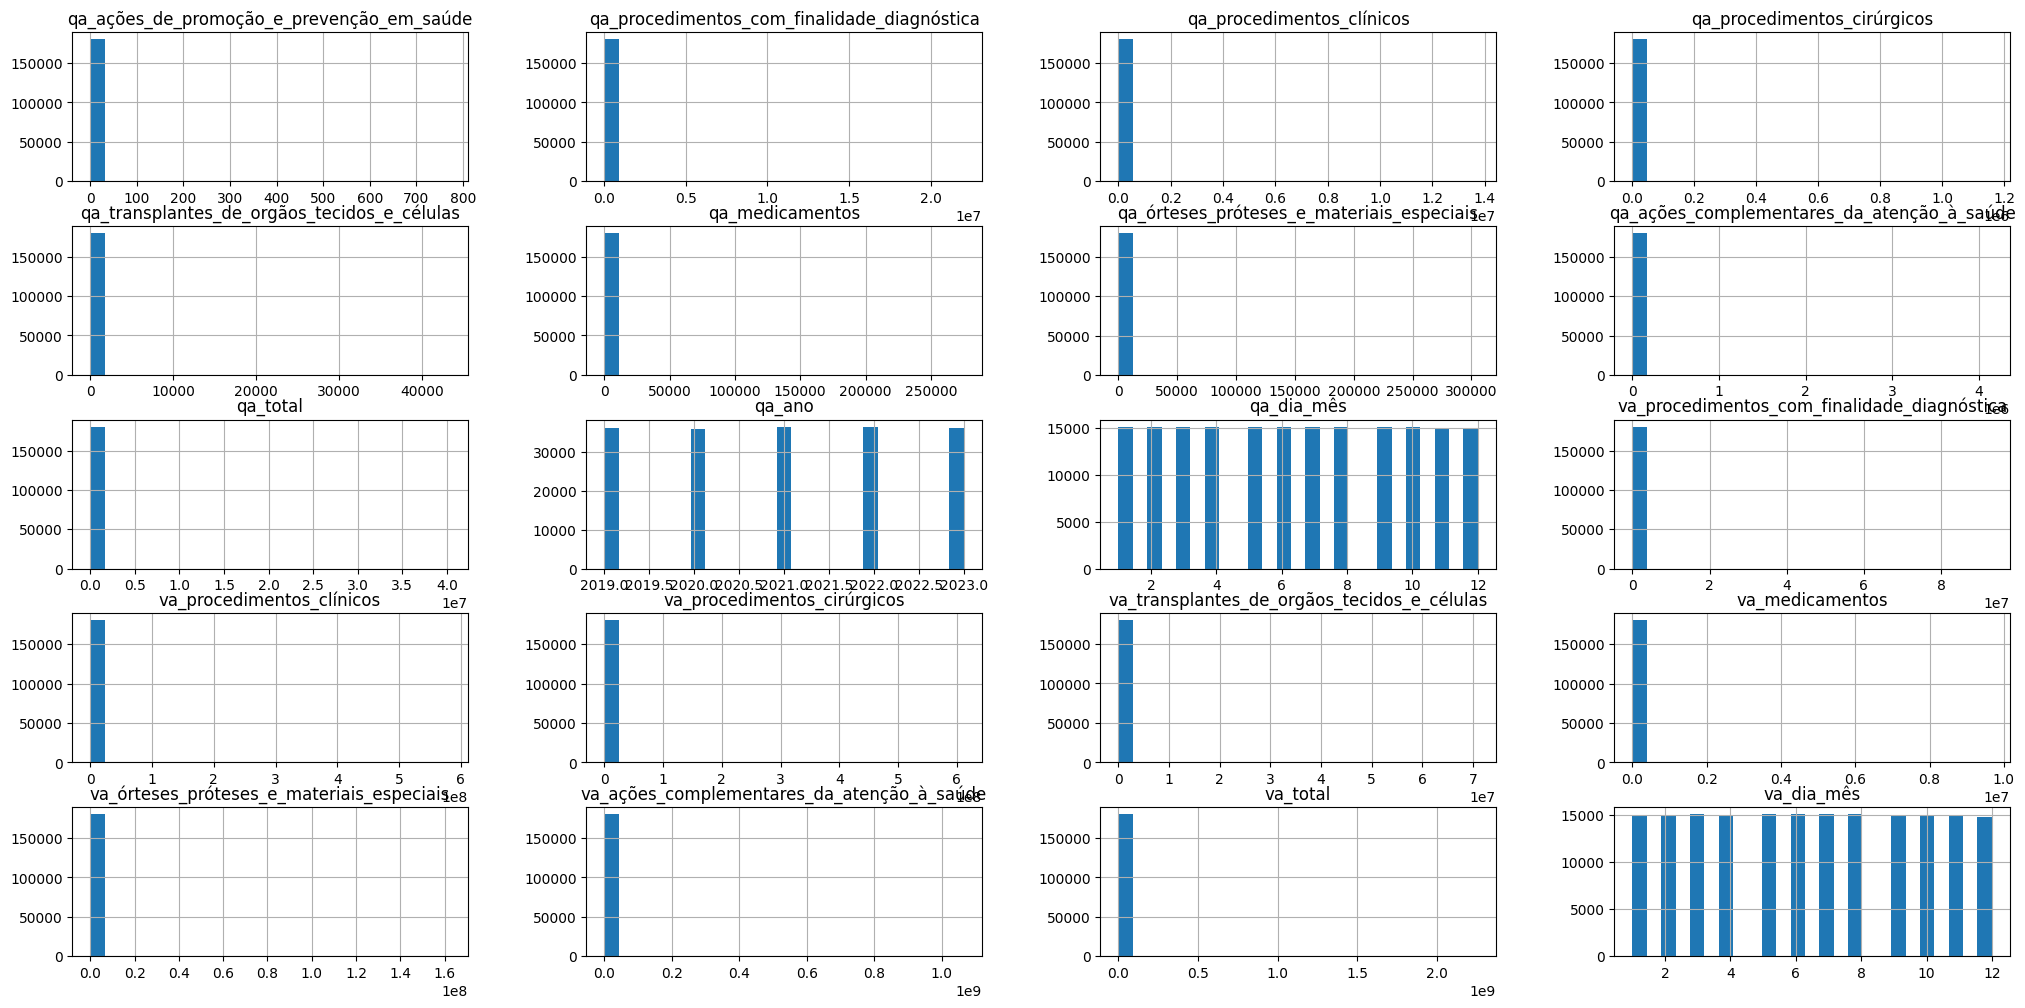

In [ ]:
#Distribuição dos procedimentos cirúrgicos
df1_num.hist(bins=25, figsize=(25, 12));


### 2.6.2 Categorical Attributes

In [ ]:
df1_cat.apply(lambda x: x.unique().shape[0])

qa_município    3233
qa_período        60
qa_mês            12
va_município    3234
va_período        61
va_mês            13
va_ano             6
dtype: int64

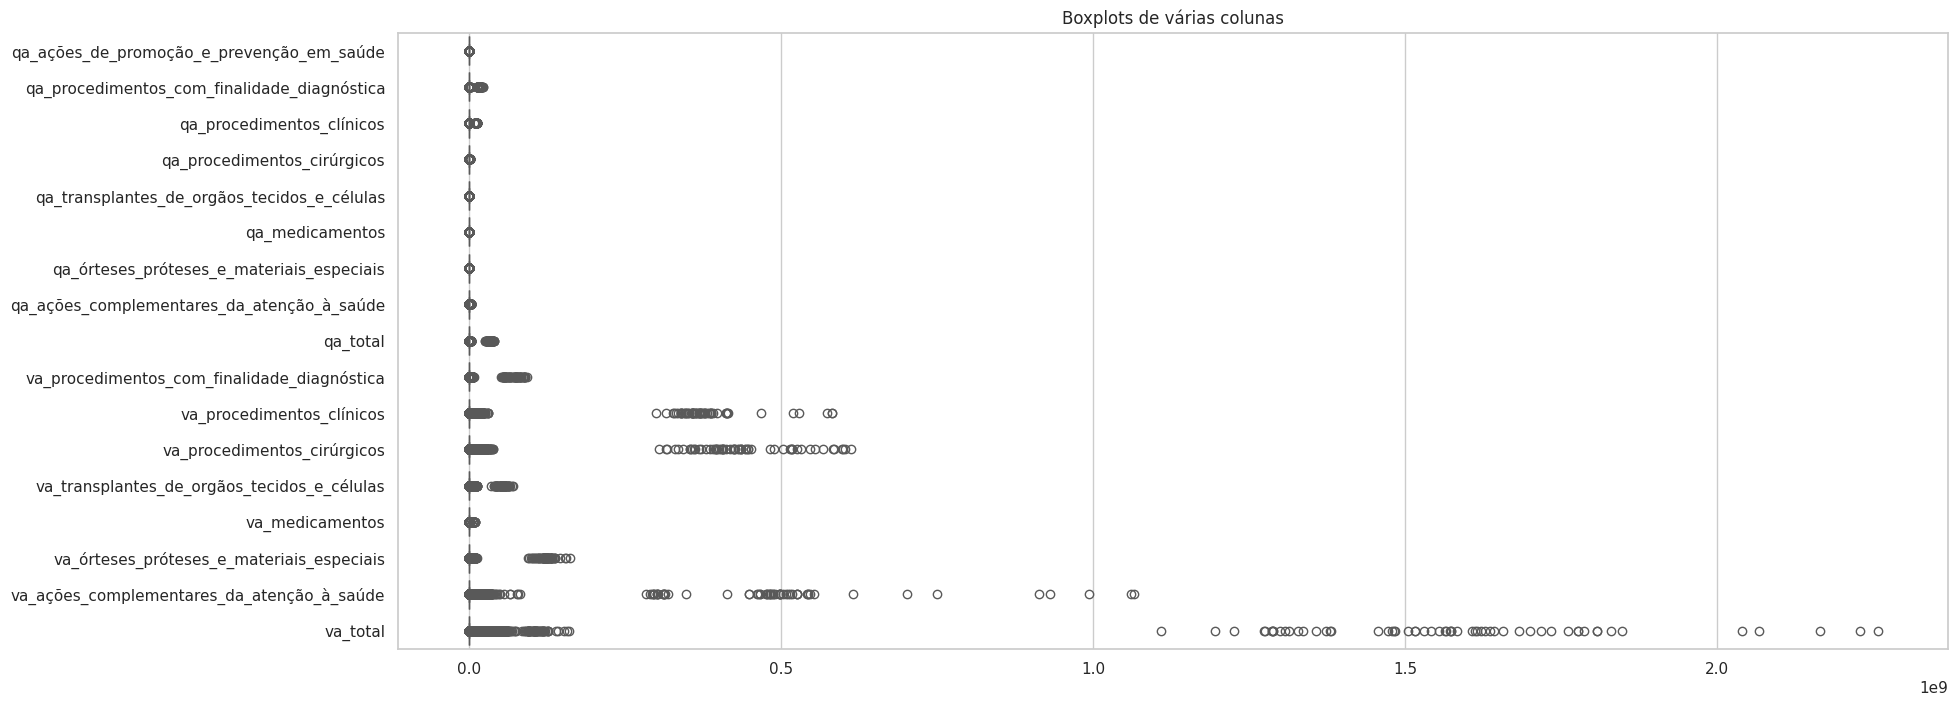

In [ ]:
# Seleciona as colunas do DataFrame que você deseja visualizar
colunas = ['qa_ações_de_promoção_e_prevenção_em_saúde',
           'qa_procedimentos_com_finalidade_diagnóstica',
           'qa_procedimentos_clínicos',
           'qa_procedimentos_cirúrgicos',
           'qa_transplantes_de_orgãos_tecidos_e_células',
           'qa_medicamentos',
           'qa_órteses_próteses_e_materiais_especiais',
           'qa_ações_complementares_da_atenção_à_saúde',
           'qa_total',
           'va_procedimentos_com_finalidade_diagnóstica',
           'va_procedimentos_clínicos',
           'va_procedimentos_cirúrgicos',
           'va_transplantes_de_orgãos_tecidos_e_células',
           'va_medicamentos',
           'va_órteses_próteses_e_materiais_especiais',
           'va_ações_complementares_da_atenção_à_saúde',
           'va_total']

sns.set(style="whitegrid")
plt.figure(figsize=(20, 8))
sns.boxplot(data=df_agrupado[colunas], orient="h", palette="Set2")
plt.title('Boxplots de várias colunas')
plt.show()

# - export dados CSV -

In [ ]:
df_agrupado.to_csv('df_agrupado.csv', index=False)